## **Importing Necessary Modules**

In [1]:
## Run this cell if you are using on colab else skip it
## Make sure you have the folder "My Drive/Coding Challenge/Python" in your drive folders with the provided "quant_club_test_utils.py" file

from google.colab import drive
import sys
import numpy.random as random

In [2]:
drive.mount('/content/gdrive/', force_remount=True)
sys.path.append('/content/gdrive/My Drive/Python/')
from test_utils import plot_paths, plot_final_dist, plot_returns

Mounted at /content/gdrive/


## **Monte Carlo Simulator**
Sampling different paths using simulations and store them in a 2D list of size (max_simulations*(timesteps + 1))

timesteps + 1 is due to the initial element being the starting price of day 0

In [44]:
timesteps = 30
starting_price = 600
volatility = 2
max_simulations = 5000


paths = random.random((max_simulations, timesteps+1))
for i in range(max_simulations):
  paths[i][0] = starting_price
  for j in range(1, timesteps+1):
    paths[i][j] -= 0.5
    paths[i][j] *= 2*volatility 
  for j in range(1, timesteps+1):
    paths[i][j] += paths[i][j-1]
paths

array([[600.        , 599.85679727, 600.22177636, ..., 600.6852346 ,
        598.77120891, 597.67174948],
       [600.        , 600.887894  , 599.17099163, ..., 598.78053989,
        597.45130356, 596.6647037 ],
       [600.        , 599.27255262, 597.41849927, ..., 591.42326131,
        592.19968944, 592.8442252 ],
       ...,
       [600.        , 600.27108146, 602.15733944, ..., 598.16176897,
        596.59926387, 596.32015312],
       [600.        , 598.54954832, 599.04864647, ..., 612.31080715,
        613.5137053 , 614.7591223 ],
       [600.        , 599.290446  , 601.03300708, ..., 611.29239983,
        609.48241067, 611.10221353]])

## **Plotting Results**

Here we will be plotting all the different paths that were simulated

In [30]:
help(plot_paths)

Help on function plot_paths in module quant_club_test_utils:

plot_paths(x, starting_price)
    Input:
        x : A 2D list containing all the paths
        starting_price : Starting price of the stock
    
    Output:
        It plots the different paths taken by the simuator



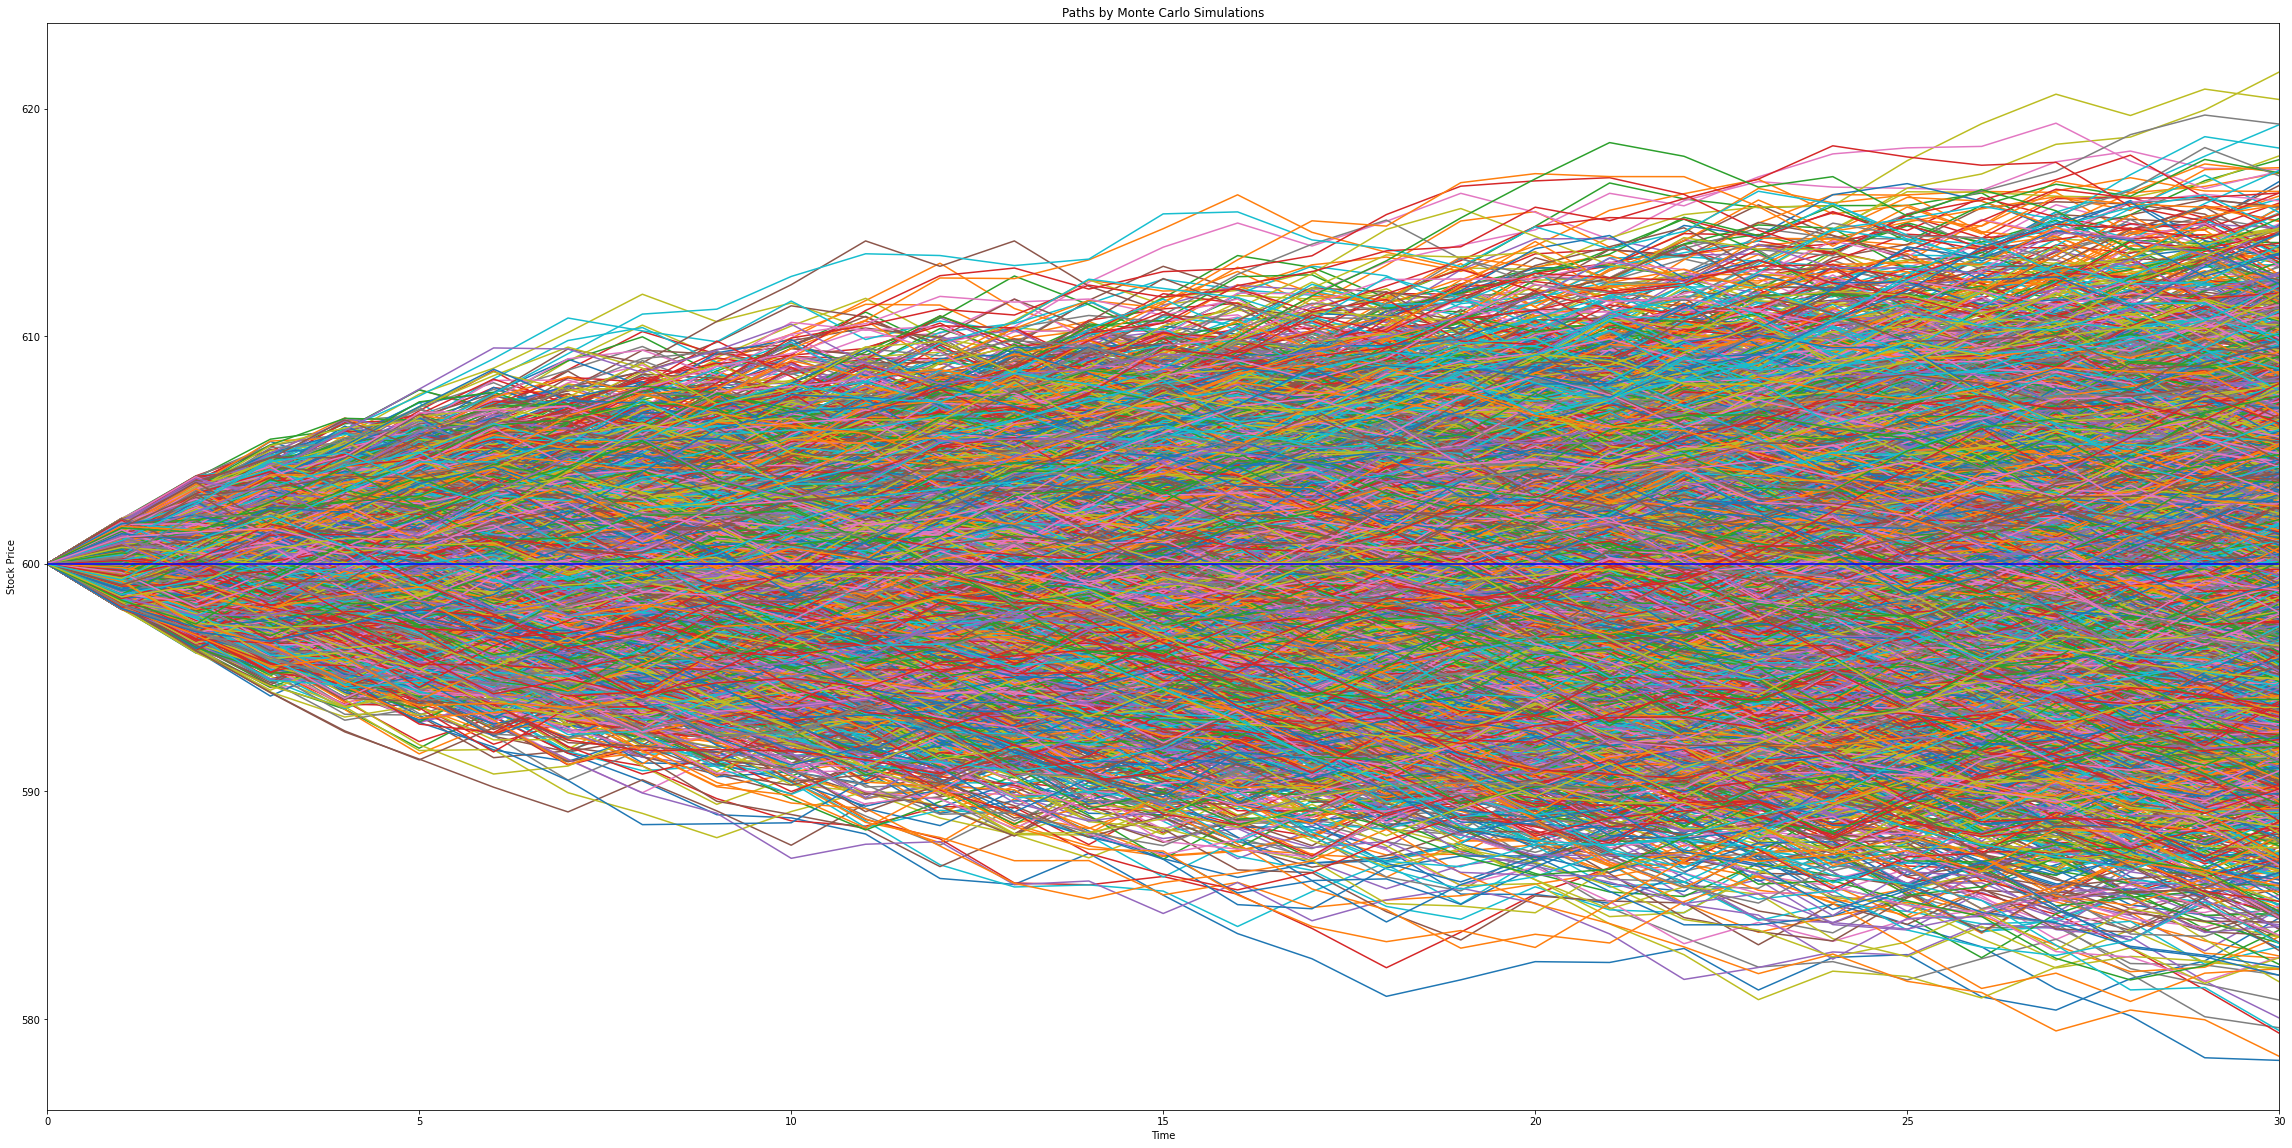

In [45]:
plot_paths(paths, starting_price)

Here we will be plotting the final distribution of the stock price at the last day of trade.


In [36]:
help(plot_final_dist)

Help on function plot_final_dist in module quant_club_test_utils:

plot_final_dist(x)
    Input:
        x : A list containing all simuated values of the stock at the end of the time period 
    
    Output:
        It plots the distribution(histogram) of the final values



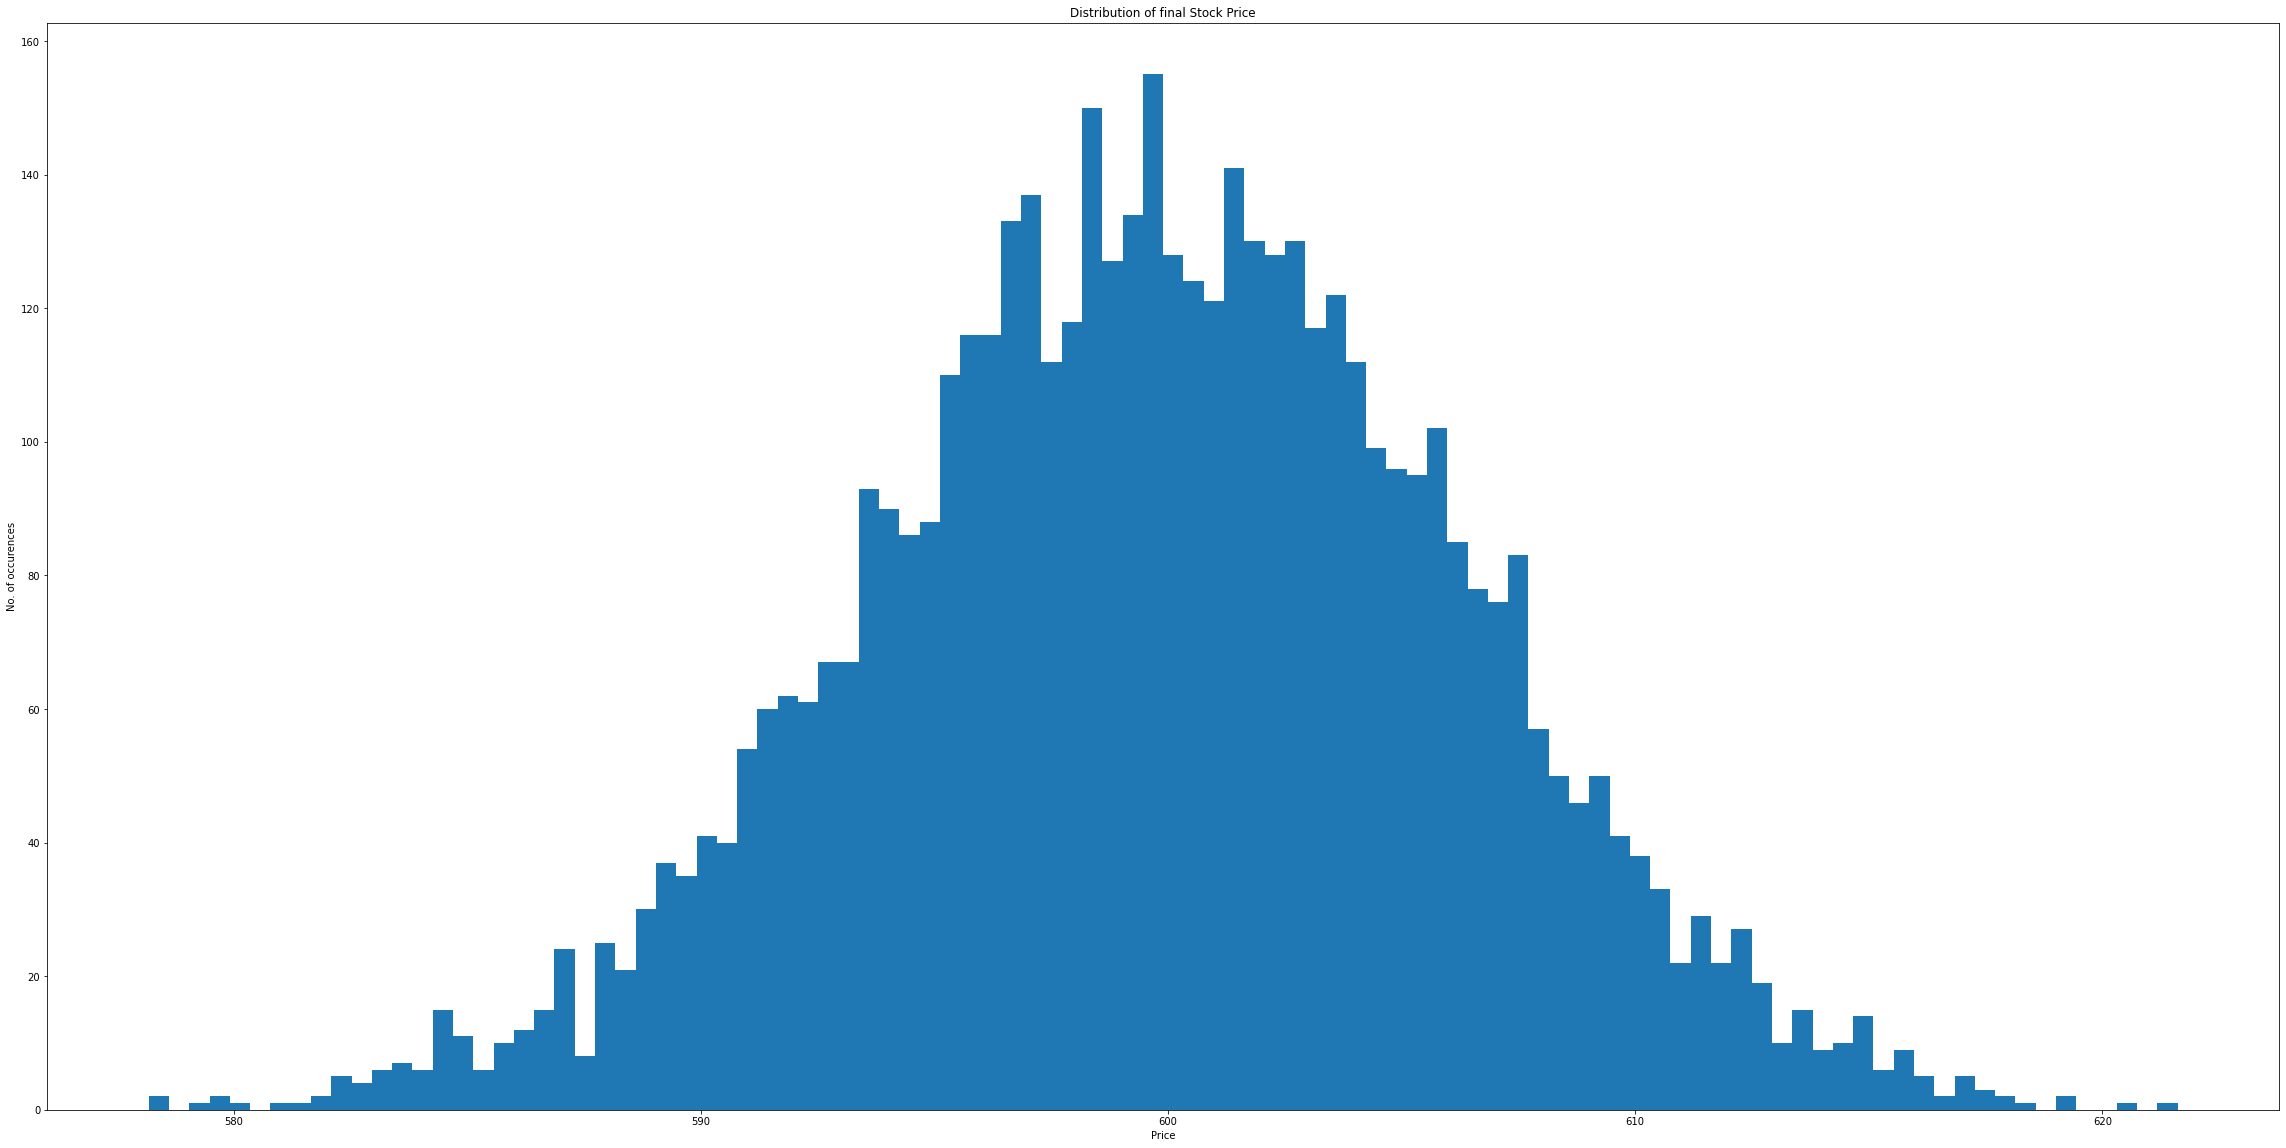

In [46]:
final_values = paths[:, -1]
plot_final_dist(final_values)

Here we are plotting the expected returns over many simulations.


In [42]:
help(plot_returns)

Help on function plot_returns in module quant_club_test_utils:

plot_returns(x)
    Input:
        x : A list containing the returns at the end of the time period
    
    Output:
        It plots the returns(both types) with the number of simulations



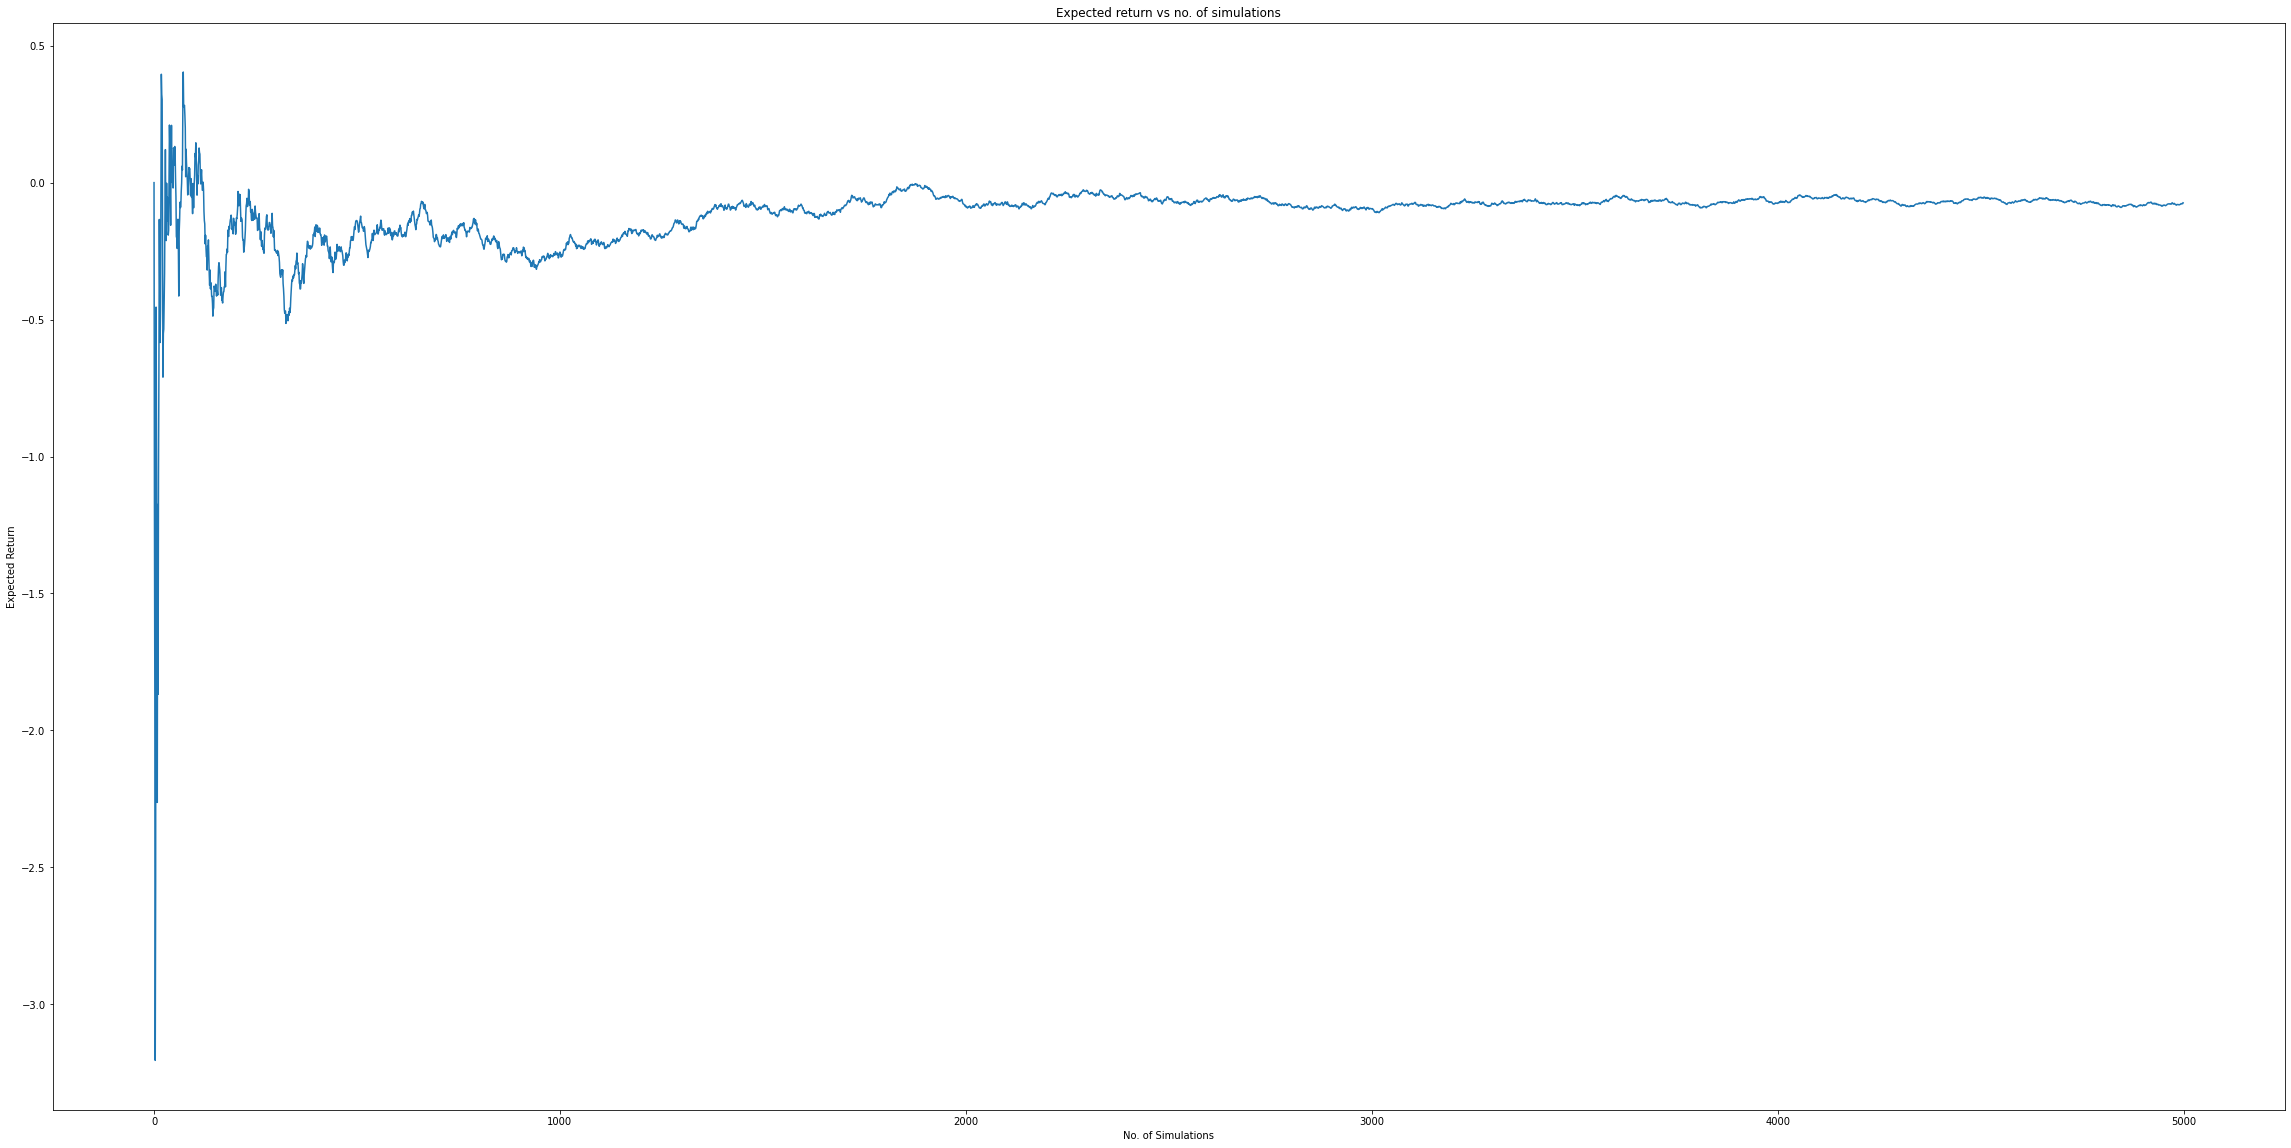

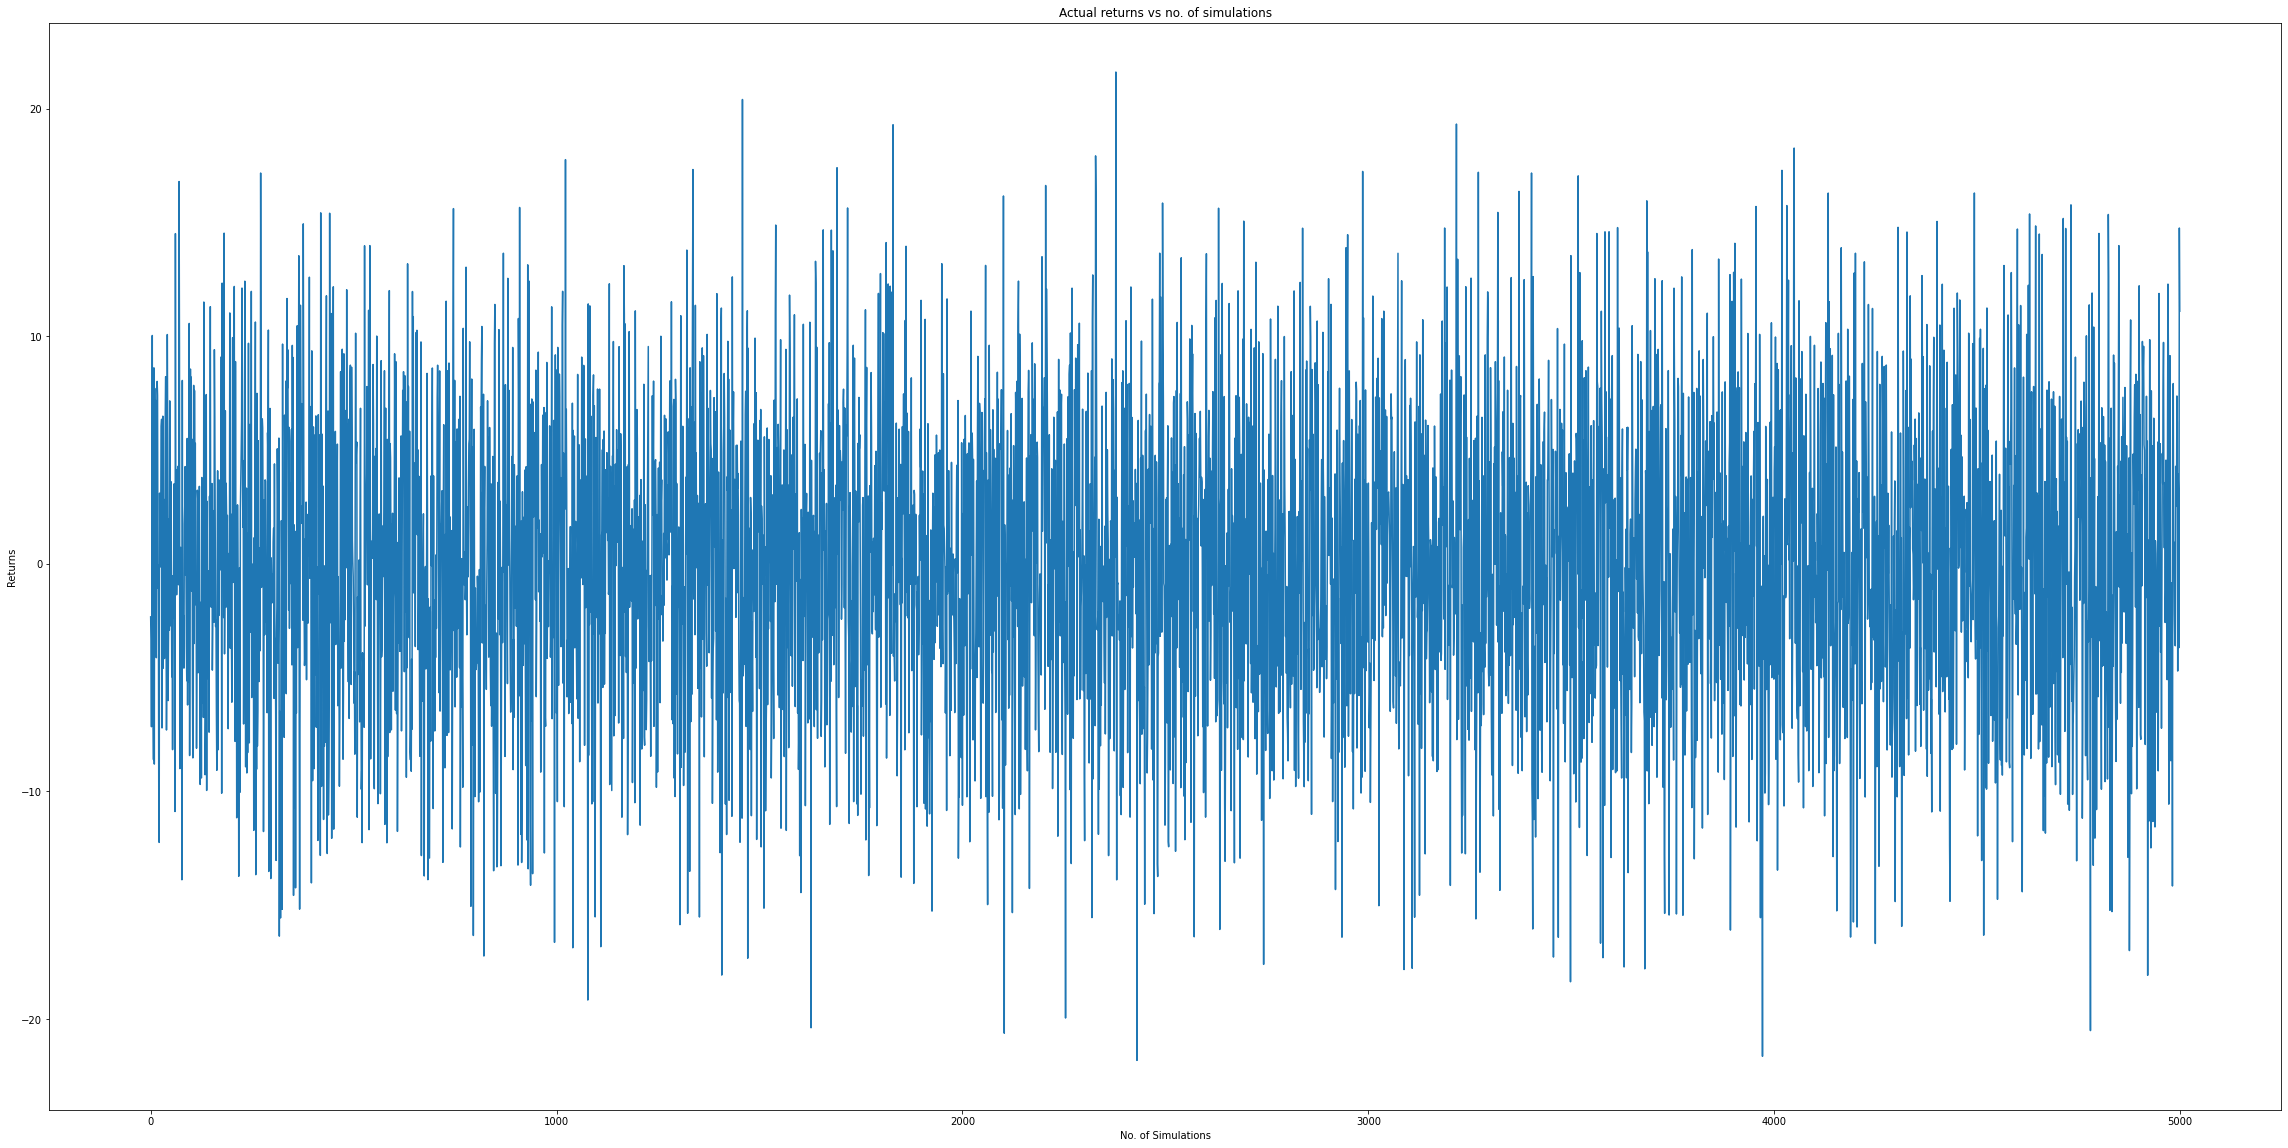

In [47]:
returns = [(x - starting_price) for x in final_values]
plot_returns(returns)